#Modelagem FutIA

Código escrito no Google Colab

#Bibliotecas Utilizada:

In [ ]:
! pip install --pre pycaret

In [2]:
from pycaret.utils import version
version()

'3.0.0.rc8'

In [ ]:
! pip install mlflow

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np

from pycaret.classification import *

#Carregando base de dados:


In [5]:
df_dataset = pd.read_parquet('dataset_9.parquet')
df_dataset.head()

,Ano,Rodada,id,fgk_equipe,Oponente,TR0,TR1,TR2,TR3,TR4,...,OP4,OC0,OC1,OC2,OC3,OC4,OGL,Resultado,GP,GC
0,2014-2015,6,9d2c4411,17892952,b2b47a98,1,0,2,1,0,...,0,2,4,3,0,2,1,2,1,0
1,2014-2015,7,bc4351a4,17892952,8ef52968,2,1,0,2,1,...,1,0,0,2,1,1,0,0,1,3
2,2014-2015,8,6fa0779f,17892952,fb10988f,0,2,1,0,2,...,3,2,0,1,4,0,1,2,2,1
3,2014-2015,9,2be4379e,17892952,33c895d4,2,0,2,1,0,...,4,0,1,1,0,0,0,0,0,1
4,2014-2015,10,c172f461,17892952,7c21e445,0,2,0,2,1,...,3,1,1,0,2,1,1,1,2,2


In [6]:
df_dataset.columns

Index(['Ano', 'Rodada', 'id', 'fgk_equipe', 'Oponente', 'TR0', 'TR1', 'TR2',
       'TR3', 'TR4', 'TL0', 'TL1', 'TL2', 'TL3', 'TL4', 'TP0', 'TP1', 'TP2',
       'TP3', 'TP4', 'TC0', 'TC1', 'TC2', 'TC3', 'TC4', 'TGL', 'OR0', 'OR1',
       'OR2', 'OR3', 'OR4', 'OL0', 'OL1', 'OL2', 'OL3', 'OL4', 'OP0', 'OP1',
       'OP2', 'OP3', 'OP4', 'OC0', 'OC1', 'OC2', 'OC3', 'OC4', 'OGL',
       'Resultado', 'GP', 'GC'],
      dtype='object')

#Tratamento de dados

##Criação das médias móveis:

In [7]:
df_train = df_dataset[['Ano', 'Rodada', 'id', 'fgk_equipe', 'Oponente', 'Resultado', 'GP', 'GC', 'TGL', 'OGL']]

In [8]:
df_train['TR_mean'] = df_dataset[['TR0', 'TR1', 'TR2', 'TR3', 'TR4']].mean(axis=1)
df_train['TL_mean'] = df_dataset[['TL0', 'TL1', 'TL2', 'TL3', 'TL4']].mean(axis=1)
df_train['TP_mean'] = df_dataset[['TP0', 'TP1', 'TP2', 'TP3', 'TP4']].mean(axis=1)
df_train['TC_mean'] = df_dataset[['TC0', 'TC1', 'TC2', 'TC3', 'TC4']].mean(axis=1)
df_train['OR_mean'] = df_dataset[['OR0', 'OR1', 'OR2', 'OR3', 'OR4']].mean(axis=1)
df_train['OL_mean'] = df_dataset[['OL0', 'OL1', 'OL2', 'OL3', 'OL4']].mean(axis=1)
df_train['OP_mean'] = df_dataset[['OP0', 'OP1', 'OP2', 'OP3', 'OP4']].mean(axis=1)
df_train['OC_mean'] = df_dataset[['OC0', 'OC1', 'OC2', 'OC3', 'OC4']].mean(axis=1)

In [9]:
df_train.head()

,Ano,Rodada,id,fgk_equipe,Oponente,Resultado,GP,GC,TGL,OGL,TR_mean,TL_mean,TP_mean,TC_mean,OR_mean,OL_mean,OP_mean,OC_mean
0,2014-2015,6,9d2c4411,17892952,b2b47a98,2,1,0,1,1,0.8,0.4,0.8,1.0,0.6,0.6,1.0,2.2
1,2014-2015,7,bc4351a4,17892952,8ef52968,0,1,3,0,0,1.2,0.4,1.0,0.8,0.8,0.6,0.6,0.8
2,2014-2015,8,6fa0779f,17892952,fb10988f,2,2,1,1,1,1.0,0.4,1.0,1.2,0.8,0.6,1.4,1.4
3,2014-2015,9,2be4379e,17892952,33c895d4,0,0,1,0,0,1.0,0.6,1.2,1.4,1.6,0.6,3.0,0.4
4,2014-2015,10,c172f461,17892952,7c21e445,1,2,2,1,1,1.0,0.4,1.2,1.4,1.6,0.6,2.2,1.0


##Criando coluna de resultado como empate e não empate:

Primeiro vou alterar a coluna resultados:

Antes: </br>
0 - Derrota </br>
1 - Empate </br>
2 - Vitória 

Depois: </br>
0 - Empate </br>
1 - Derrota </br>
2 - Vitória 

In [10]:
df_train['Resultado'].replace(to_replace=0, value=3, inplace=True)
df_train['Resultado'].replace(to_replace=1, value=0, inplace=True)
df_train['Resultado'].replace(to_replace=3, value=1, inplace=True)

Aqui vamos deixar: </br>
0 - Empate </br>
1 - Não Empate

In [11]:
df_train['Resultado'].value_counts()

2    2091
1    2091
0    1264
Name: Resultado, dtype: int64

In [12]:
df_train['Resultado_Empate'] = df_train['Resultado']
df_train['Resultado_Empate'].replace(to_replace=2, value=1, inplace=True)

In [13]:
df_train['Resultado_Empate'].value_counts()

1    4182
0    1264
Name: Resultado_Empate, dtype: int64

In [14]:
df_train.columns

Index(['Ano', 'Rodada', 'id', 'fgk_equipe', 'Oponente', 'Resultado', 'GP',
       'GC', 'TGL', 'OGL', 'TR_mean', 'TL_mean', 'TP_mean', 'TC_mean',
       'OR_mean', 'OL_mean', 'OP_mean', 'OC_mean', 'Resultado_Empate'],
      dtype='object')

In [15]:
df_test_ve =  df_train[['TR_mean', 'TL_mean', 'TP_mean',
                         'TC_mean', 'OR_mean', 'OL_mean',
                         'OP_mean', 'OC_mean']]

In [16]:
df_test_vd = df_train[['TR_mean', 'TL_mean', 'TP_mean',
                         'TC_mean', 'OR_mean', 'OL_mean',
                         'OP_mean', 'OC_mean']]

##Utilizando apenas dados de jogos em casa para evitar o espelhamento de dados:

In [17]:
df_train_short = df_train.drop(df_train[df_train['TGL']==0].index, axis=0)
df_train_short.head()

,Ano,Rodada,id,fgk_equipe,Oponente,Resultado,GP,GC,TGL,OGL,TR_mean,TL_mean,TP_mean,TC_mean,OR_mean,OL_mean,OP_mean,OC_mean,Resultado_Empate
0,2014-2015,6,9d2c4411,17892952,b2b47a98,2,1,0,1,1,0.8,0.4,0.8,1.0,0.6,0.6,1.0,2.2,1
2,2014-2015,8,6fa0779f,17892952,fb10988f,2,2,1,1,1,1.0,0.4,1.0,1.2,0.8,0.6,1.4,1.4,1
4,2014-2015,10,c172f461,17892952,7c21e445,0,2,2,1,1,1.0,0.4,1.2,1.4,1.6,0.6,2.2,1.0,0
6,2014-2015,12,f618534b,17892952,943e8050,1,1,2,1,1,1.0,0.4,1.4,1.6,0.6,0.6,1.0,2.2,1
9,2014-2015,15,625f358a,17892952,18bb7c10,2,3,2,1,1,0.6,0.4,1.2,1.6,1.2,0.6,1.4,0.8,1


In [18]:
df_train_short['Resultado_Empate'].value_counts()

1    2091
0     632
Name: Resultado_Empate, dtype: int64

#Modelagem:

##Selecionando as variáveis que desejamos:

In [19]:
df_train_cut = df_train_short[['TR_mean', 'TL_mean', 'TP_mean',
                         'TC_mean', 'OR_mean', 'OL_mean',
                         'OP_mean', 'OC_mean', 'Resultado_Empate']]

In [20]:
df_train_cut.head()

,TR_mean,TL_mean,TP_mean,TC_mean,OR_mean,OL_mean,OP_mean,OC_mean,Resultado_Empate
0,0.8,0.4,0.8,1.0,0.6,0.6,1.0,2.2,1
2,1.0,0.4,1.0,1.2,0.8,0.6,1.4,1.4,1
4,1.0,0.4,1.2,1.4,1.6,0.6,2.2,1.0,0
6,1.0,0.4,1.4,1.6,0.6,0.6,1.0,2.2,1
9,0.6,0.4,1.2,1.6,1.2,0.6,1.4,0.8,1


##Escolha do modelo:

In [21]:
exp_clf1 = setup(data = df_train_cut, 
                 target = 'Resultado_Empate')

,Description,Value
0,Session id,1937
1,Target,Resultado_Empate
2,Target type,Binary
3,Original data shape,"(2723, 9)"
4,Transformed data shape,"(2723, 9)"
5,Transformed train set shape,"(1906, 9)"
6,Transformed test set shape,"(817, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [22]:
%%time

best_model = compare_models(fold=5, sort='Prec.')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7319,0.5196,0.9187,0.7745,0.8404,0.0383,0.0411,0.0600
lightgbm,Light Gradient Boosting Machine,0.7361,0.5331,0.9276,0.7738,0.8437,0.0378,0.0450,0.3080
dt,Decision Tree Classifier,0.6264,0.5113,0.7261,0.7736,0.7490,0.0213,0.0214,0.0420
et,Extra Trees Classifier,0.7440,0.5209,0.9454,0.7723,0.8501,0.0296,0.0382,0.2700
rf,Random Forest Classifier,0.7503,0.5239,0.9597,0.7711,0.8551,0.0227,0.0347,0.3120
lr,Logistic Regression,0.7681,0.5016,1.0000,0.7681,0.8688,0.0000,0.0000,0.8500
svm,SVM - Linear Kernel,0.7681,0.0000,1.0000,0.7681,0.8688,0.0000,0.0000,0.0340
ridge,Ridge Classifier,0.7681,0.0000,1.0000,0.7681,0.8688,0.0000,0.0000,0.0300
lda,Linear Discriminant Analysis,0.7681,0.5011,1.0000,0.7681,0.8688,0.0000,0.0000,0.0340
dummy,Dummy Classifier,0.7681,0.5000,1.0000,0.7681,0.8688,0.0000,0.0000,0.0560


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

CPU times: user 4.84 s, sys: 231 ms, total: 5.08 s
Wall time: 16.5 s


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7382,0.5645,0.9283,0.7749,0.8447,0.0526,0.0630
1,0.7480,0.5494,0.9454,0.7759,0.8523,0.0487,0.0630
2,0.7428,0.4882,0.9488,0.7701,0.8502,0.0077,0.0106
3,0.7480,0.4963,0.9556,0.7713,0.8537,0.0172,0.0247
4,0.7428,0.5062,0.9486,0.7694,0.8497,0.0218,0.0298
Mean,0.7440,0.5209,0.9454,0.7723,0.8501,0.0296,0.0382
Std,0.0037,0.0303,0.0091,0.0026,0.0031,0.0178,0.0212


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

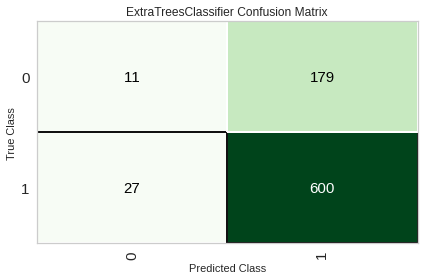

In [23]:
model_ve = create_model('et', fold=5)
plot_model(model_ve, plot = 'confusion_matrix')

#Modelo Vitória ou Derrota

Removendo os dados de empate do Dataframe:

Criando coluna que informa vitória (2) e derrota (1)

In [24]:
df_train_v_d = df_train_short.drop(df_train_short[df_train_short['Resultado']==0].index)

In [25]:
df_train_v_d['Resultado'].value_counts()

2    1238
1     853
Name: Resultado, dtype: int64

In [26]:
df_train_v_d['Resultado_Vitoria'] = df_train_v_d['Resultado']-1

In [27]:
df_train_v_d['Resultado_Vitoria'].value_counts()

1    1238
0     853
Name: Resultado_Vitoria, dtype: int64

In [28]:
df_train_v_d.columns

Index(['Ano', 'Rodada', 'id', 'fgk_equipe', 'Oponente', 'Resultado', 'GP',
       'GC', 'TGL', 'OGL', 'TR_mean', 'TL_mean', 'TP_mean', 'TC_mean',
       'OR_mean', 'OL_mean', 'OP_mean', 'OC_mean', 'Resultado_Empate',
       'Resultado_Vitoria'],
      dtype='object')

In [29]:
df_train_v_d_cut = df_train_v_d[['TR_mean', 'TL_mean', 'TP_mean',
                                 'TC_mean', 'OR_mean', 'OL_mean',
                                 'OP_mean', 'OC_mean', 'Resultado_Vitoria']]

In [30]:
exp_clf2 = setup(data = df_train_v_d_cut, 
                 target = 'Resultado_Vitoria') 

,Description,Value
0,Session id,7082
1,Target,Resultado_Vitoria
2,Target type,Binary
3,Original data shape,"(2091, 9)"
4,Transformed data shape,"(2091, 9)"
5,Transformed train set shape,"(1463, 9)"
6,Transformed test set shape,"(628, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [31]:
%%time

best_model = compare_models(fold=5, sort='Prec.')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.6609,0.7061,0.7367,0.7041,0.7198,0.2910,0.2918,0.0360
ada,Ada Boost Classifier,0.6623,0.6889,0.7921,0.6872,0.7353,0.2751,0.2812,0.1380
lr,Logistic Regression,0.6719,0.7076,0.8245,0.6852,0.7483,0.2884,0.2994,0.1440
rf,Random Forest Classifier,0.6528,0.6736,0.7656,0.6849,0.7227,0.2618,0.2653,0.3420
svm,SVM - Linear Kernel,0.6459,0.0000,0.8002,0.6837,0.7214,0.2261,0.2609,0.0320
lda,Linear Discriminant Analysis,0.6678,0.7069,0.8176,0.6835,0.7444,0.2806,0.2905,0.0360
ridge,Ridge Classifier,0.6678,0.0000,0.8222,0.6820,0.7454,0.2791,0.2900,0.0280
gbc,Gradient Boosting Classifier,0.6596,0.6814,0.8049,0.6801,0.7367,0.2645,0.2732,0.1600
et,Extra Trees Classifier,0.6323,0.6612,0.7391,0.6728,0.7040,0.2213,0.2233,0.2500
lightgbm,Light Gradient Boosting Machine,0.6268,0.6511,0.7309,0.6698,0.6986,0.2108,0.2127,0.0800


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

CPU times: user 4.62 s, sys: 112 ms, total: 4.73 s
Wall time: 11.3 s


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6553,0.6928,0.7241,0.7039,0.7139,0.2806,0.2808
1,0.6792,0.7220,0.7514,0.7182,0.7345,0.3298,0.3304
2,0.6997,0.7353,0.7977,0.7225,0.7582,0.3644,0.3675
3,0.6096,0.6708,0.6936,0.6630,0.6780,0.1830,0.1833
4,0.6610,0.7096,0.7168,0.7126,0.7147,0.2970,0.2970
Mean,0.6609,0.7061,0.7367,0.7041,0.7198,0.2910,0.2918
Std,0.0300,0.0226,0.0356,0.0215,0.0265,0.0612,0.0619


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

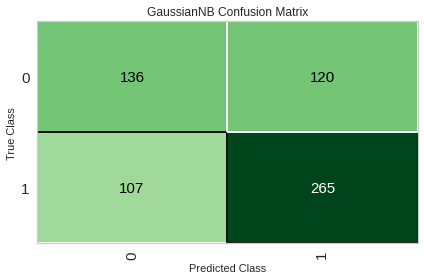

In [32]:
model_vd = create_model('nb', fold=5)
plot_model(model_vd, plot = 'confusion_matrix')

#Tentativa de compilação do resultado dos dois modelos:

Escolher os modelos, rodar e comparar os resultados com a coluna de Resultados original.

In [33]:
df_train['Resultado_ve'] = model_ve.predict(df_test_ve)
df_train['Resultado_ve'].value_counts()

1    4769
0     677
Name: Resultado_ve, dtype: int64

In [34]:
df_train['Resultado_vd'] = model_vd.predict(df_test_vd) + 1
df_train['Resultado_vd'].value_counts()

2    3608
1    1838
Name: Resultado_vd, dtype: int64

In [35]:
df_train['Resultado_modelo'] = df_train['Resultado_ve'] * df_train['Resultado_vd']
df_train['Resultado_modelo'].value_counts()

2    3156
1    1613
0     677
Name: Resultado_modelo, dtype: int64

In [36]:
pd.crosstab(df_train['Resultado'], df_train['Resultado_modelo'])

Resultado_modelo,0,1,2
Resultado,,,
0,494,239,531
1,100,911,1080
2,83,463,1545
